In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

%matplotlib inline

In [79]:
# load steps data
stepsData = pd.read_csv("dailySteps_merged.csv")
stepsData

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669
...,...,...,...
935,8877689391,5/8/2016,10686
936,8877689391,5/9/2016,20226
937,8877689391,5/10/2016,10733
938,8877689391,5/11/2016,21420


In [24]:
# find unique users
users = stepsData.Id.unique()
print(users)

[1503960366 1624580081 1644430081 1844505072 1927972279 2022484408
 2026352035 2320127002 2347167796 2873212765 3372868164 3977333714
 4020332650 4057192912 4319703577 4388161847 4445114986 4558609924
 4702921684 5553957443 5577150313 6117666160 6290855005 6775888955
 6962181067 7007744171 7086361926 8053475328 8253242879 8378563200
 8583815059 8792009665 8877689391]


In [25]:
# extract data for one user
firstUser = stepsData[stepsData.Id == 1503960366]

<AxesSubplot:xlabel='ActivityDay'>

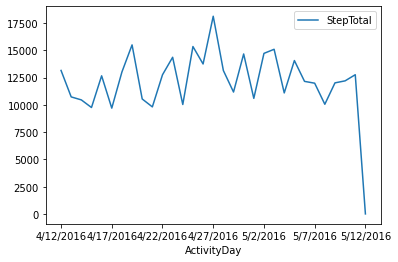

In [12]:
# test plotting for first user 
firstUser.plot.line('ActivityDay', 'StepTotal')

In [40]:
totalUsers = len(users)
print(totalUsers)

33


Id
1503960366    AxesSubplot(0.125,0.125;0.775x0.755)
1624580081    AxesSubplot(0.125,0.125;0.775x0.755)
1644430081    AxesSubplot(0.125,0.125;0.775x0.755)
1844505072    AxesSubplot(0.125,0.125;0.775x0.755)
1927972279    AxesSubplot(0.125,0.125;0.775x0.755)
2022484408    AxesSubplot(0.125,0.125;0.775x0.755)
2026352035    AxesSubplot(0.125,0.125;0.775x0.755)
2320127002    AxesSubplot(0.125,0.125;0.775x0.755)
2347167796    AxesSubplot(0.125,0.125;0.775x0.755)
2873212765    AxesSubplot(0.125,0.125;0.775x0.755)
3372868164    AxesSubplot(0.125,0.125;0.775x0.755)
3977333714    AxesSubplot(0.125,0.125;0.775x0.755)
4020332650    AxesSubplot(0.125,0.125;0.775x0.755)
4057192912    AxesSubplot(0.125,0.125;0.775x0.755)
4319703577    AxesSubplot(0.125,0.125;0.775x0.755)
4388161847    AxesSubplot(0.125,0.125;0.775x0.755)
4445114986    AxesSubplot(0.125,0.125;0.775x0.755)
4558609924    AxesSubplot(0.125,0.125;0.775x0.755)
4702921684    AxesSubplot(0.125,0.125;0.775x0.755)
5553957443    AxesSubplot(0.

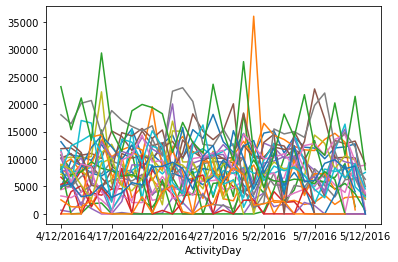

In [56]:
# plot all users
fig, ax = plt.subplots()
stepsData.groupby(['Id']).plot(x = 'ActivityDay',  y = 'StepTotal', ax =ax, legend=False)

Plotting all users together is noisy - no clear trends over time

<AxesSubplot:xlabel='Id'>

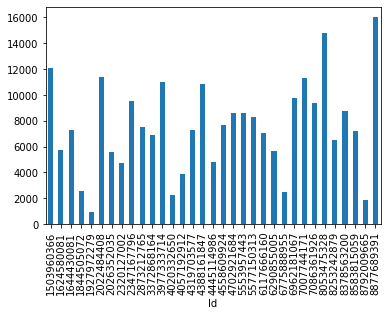

In [62]:
#plot avgs by user
stepsData.groupby(['Id']).mean('StepsTotal').plot.bar(legend=False)

In [96]:
# what are the top 5 users by mean steps
topMeans = stepsData.groupby(['Id']).mean('StepsTotal').sort_values(by='StepTotal', ascending=False).head()
topMeans.index

Int64Index([8877689391, 8053475328, 1503960366, 2022484408, 7007744171], dtype='int64', name='Id')

In [101]:
# further examine the top 5 
topWalkers =stepsData[stepsData.Id.isin(topMeans.index)]
topWalkers

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669
...,...,...,...
935,8877689391,5/8/2016,10686
936,8877689391,5/9/2016,20226
937,8877689391,5/10/2016,10733
938,8877689391,5/11/2016,21420


Id
1503960366    AxesSubplot(0.125,0.125;0.775x0.755)
2022484408    AxesSubplot(0.125,0.125;0.775x0.755)
7007744171    AxesSubplot(0.125,0.125;0.775x0.755)
8053475328    AxesSubplot(0.125,0.125;0.775x0.755)
8877689391    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

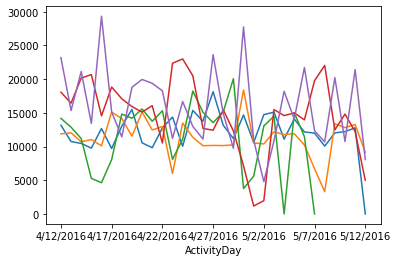

In [104]:
# plot top users
fig, ax = plt.subplots()
topWalkers.groupby(['Id']).plot(x = 'ActivityDay',  y = 'StepTotal', ax =ax, legend=False)

Do the top walkers seem to walk more or less frequently as we evolve in time? Is there a clear trend followed by this group?

Upon examining only the top users, we see that again there doesn't seem to be a clear trend for walker behaviour by these 5 users

In [8]:
# load activity data
activityData = pd.read_csv("dailyActivity_merged.csv")
activityData


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [6]:
# load sleep data
sleepData = pd.read_csv("sleepDay_merged.csv")
sleepData

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


I expect that more steps means more calories burned - is this always the case?

<AxesSubplot:xlabel='TotalSteps', ylabel='Calories'>

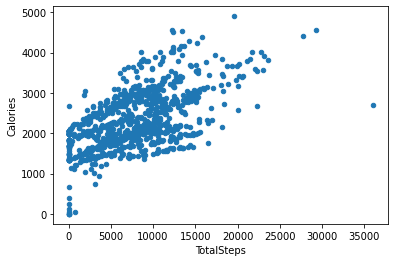

In [9]:
activityData.plot.scatter(x = 'TotalSteps', y = 'Calories')

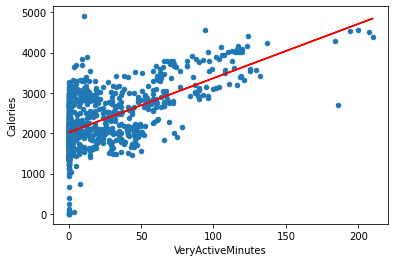

In [40]:
activityData.plot.scatter(x = 'VeryActiveMinutes', y = 'Calories')
x = activityData['VeryActiveMinutes']
y = activityData['Calories']
slope, intercept, rVal, pVal, stdErr = linregress(x, y)
plt.plot(x, slope*x + intercept, 'r')

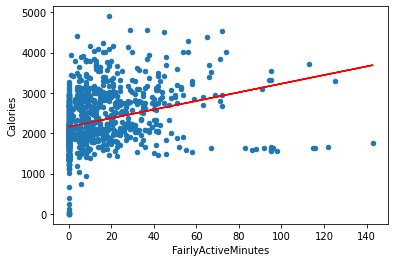

In [38]:
activityData.plot.scatter(x = 'FairlyActiveMinutes', y = 'Calories')
x = activityData['FairlyActiveMinutes']
y = activityData['Calories']
slope, intercept, rVal, pVal, stdErr = linregress(x, y)
plt.plot(x, slope*x + intercept, 'r')

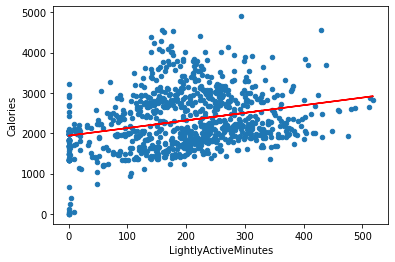

In [37]:
activityData.plot.scatter(x = 'LightlyActiveMinutes', y = 'Calories')
x = activityData['LightlyActiveMinutes']
y = activityData['Calories']
slope, intercept, rVal, pVal, stdErr = linregress(x, y)
plt.plot(x, slope*x + intercept, 'r')

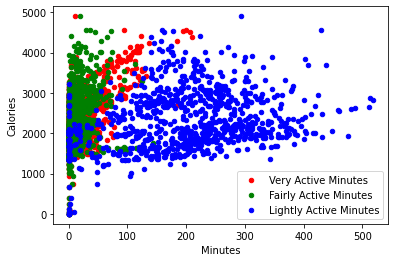

In [29]:
ax1 = activityData.plot.scatter(x = 'VeryActiveMinutes', y = 'Calories', color = 'r', label = "Very Active Minutes")
ax2 = activityData.plot.scatter(x = 'FairlyActiveMinutes', y = 'Calories', color = 'g', ax = ax1, label = "Fairly Active Minutes")
ax3 = activityData.plot.scatter(x = 'LightlyActiveMinutes', y = 'Calories', color = 'b', ax = ax1, xlabel = "Minutes", label = "Lightly Active Minutes")


We can make some draw some conclusions about the above figure:
- The majority of minutes were spent in lightly active 
- mintues classified as more active results in higher calorie burn
- there does not seem to be a large difference in the calorie burn between minutes considered very active and fairly active

We will consider only very and fairly active - expect very to have higer calorie burn


Very active r value 0.6158382682703384
Fairly active r value 0.29762346826512137


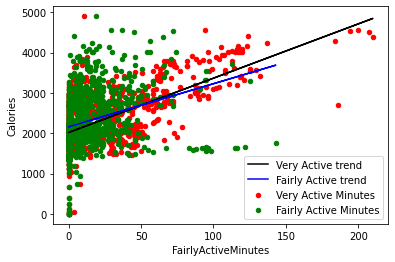

In [49]:
ax1 = activityData.plot.scatter(x = 'VeryActiveMinutes', y = 'Calories', color = 'r', label = "Very Active Minutes")
ax2 = activityData.plot.scatter(x = 'FairlyActiveMinutes', y = 'Calories', color = 'g', ax = ax1, label = "Fairly Active Minutes")

# trend line for very active
x1 = activityData['VeryActiveMinutes']
y1 = activityData['Calories']
slope1, intercept1, rVal1, pVal1, stdErr1 = linregress(x1, y1)
plt.plot(x1, slope1*x1 + intercept1, 'k', label = 'Very Active trend')

# trend line for fairly active
x2 = activityData['FairlyActiveMinutes']
y2 = activityData['Calories']
slope2, intercept2, rVal2, pVal2, stdErr2 = linregress(x2, y2)
plt.plot(x2, slope2*x2 + intercept2, 'b', label = 'Fairly Active trend')
plt.legend()

# print coorelation coeff to see if a straight line fits the data well
print("Very active r value",  rVal1)
print("Fairly active r value", rVal2)

Upon examining the trend lines we see that fairly active minutes seem to burn more calories initially until the trend lines cross, then very active minutes burn more

However, upon examining the r values for the trend lines, we can conclude that a straight line is not a great fit for the data